In [1]:
import s3fs
import pandas as pd
import matplotlib.pyplot as plt
import re

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
Matplotlib is building the font cache; this may take a moment.


In [2]:
# Create an S3 filesystem instance
s3 = s3fs.S3FileSystem()

# Specify the path to the CSV file in the S3 bucket
s3_path = 's3://group-mcm-rplace/sample_df (2).csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(s3.open(s3_path))
df.head()

,Unnamed: 0,timestamp,user,coordinate,pixel_color
0,0,2023-07-20 13:00:26.088000+00:00,no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...,"-199,-235",#FFFFFF
1,1,2023-07-20 13:04:46.627000+00:00,YF56mQAiwsAJZWzgMKsdbV9/C/BX6TrYCG5tI0RWei5gMB...,"-282,136",#FF4500
2,2,2023-07-20 13:04:50.488000+00:00,JVohwv9S68P/w6g43UGQ2cIYfQRDbHGz6j+e4as892QiRb...,"4,311",#000000
3,3,2023-07-20 13:04:53.186000+00:00,ZSFZbF0lkStMHMvpxTc9g1+JpjHXDHBQVdFn8wo+9gGCyX...,"231,7",#000000
4,4,2023-07-20 13:04:55.302000+00:00,jgIOrksmd9jjetEZzqaU6mmKrIJwng/c/NHdZKvtqNZZ1A...,"-492,-498",#000000


In [3]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,timestamp,user,coordinate,pixel_color
0,2023-07-20 13:00:26.088000+00:00,no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...,"-199,-235",#FFFFFF
1,2023-07-20 13:04:46.627000+00:00,YF56mQAiwsAJZWzgMKsdbV9/C/BX6TrYCG5tI0RWei5gMB...,"-282,136",#FF4500
2,2023-07-20 13:04:50.488000+00:00,JVohwv9S68P/w6g43UGQ2cIYfQRDbHGz6j+e4as892QiRb...,"4,311",#000000
3,2023-07-20 13:04:53.186000+00:00,ZSFZbF0lkStMHMvpxTc9g1+JpjHXDHBQVdFn8wo+9gGCyX...,"231,7",#000000
4,2023-07-20 13:04:55.302000+00:00,jgIOrksmd9jjetEZzqaU6mmKrIJwng/c/NHdZKvtqNZZ1A...,"-492,-498",#000000


# days 1-3 only

In [4]:
#filter df to only show first three days
df_first_3_days = df[(df["timestamp"] >= "2023-07-20") & (df["timestamp"] <= "2023-07-23")]
df_first_3_days.tail()

,timestamp,user,coordinate,pixel_color
1137674,2023-07-22 23:59:58.634000+00:00,ID44q/t1XaZx8wnIvc3s3GpWxeZpJ5IXd1AhH7jN17cTLS...,"-878,-534",#FFFFFF
1137675,2023-07-22 23:59:58.967000+00:00,L51lLW/cXbkW2DOXZGLpocEpktVVldNLlQWSfQsOh+vZT1...,"-745,-990",#000000
1137676,2023-07-22 23:59:59.232000+00:00,v1rmxgcBuaW34NxY9aspELLRZA64LT18WDdLmgoQohprjW...,"-991,-762",#FF4500
1137677,2023-07-22 23:59:59.556000+00:00,7ETsEDyFYP4SCZVSK5MgreIB3b4mtes6qGV6fpqWyPR46G...,"350,-332",#811E9F
1137678,2023-07-22 23:59:59.865000+00:00,WgovlROFaBPkMxJVTDNt9Aj3mL70oF5sUOuE0nxgQrS4GN...,"151,169",#FF4500


In [5]:
# Define a regex pattern for "int,int" format
pattern = r'^-?\d+,-?\d+$'

# Filter out coordinates that do not match the pattern
invalid_coordinates = df_first_3_days[~df_first_3_days['coordinate'].astype(str).str.match(pattern)]

print("Coordinates that do not follow the 'int,int' format:")
print(invalid_coordinates)

Coordinates that do not follow the 'int,int' format:
                                timestamp  \
65579    2023-07-20 16:51:11.951000+00:00   
65697    2023-07-20 16:51:31.935000+00:00   
65850    2023-07-20 16:51:58.081000+00:00   
66065    2023-07-20 16:52:36.683000+00:00   
67247    2023-07-20 16:56:01.377000+00:00   
...                                   ...   
1126398  2023-07-22 23:32:25.035000+00:00   
1129841  2023-07-22 23:39:38.763000+00:00   
1129884  2023-07-22 23:39:44.800000+00:00   
1132567  2023-07-22 23:45:22.917000+00:00   
1133429  2023-07-22 23:47:11.147000+00:00   

                                                      user  \
65579    A7w9V1Vj6ihJVcEyOJQNoaW5eAkGUuB6PrJRP5ExxHxBkR...   
65697    /XIhfEKO27ngFqiOWS5VBLbRGEp8eqMghGEcRtH7xFfwtX...   
65850    +4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+...   
66065    ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD...   
67247    ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD...   
...                               

In [6]:
# Regular expression patterns
pattern_int_int = r'^(-?\d+),(-?\d+)$'
pattern_int_int_int_int = r'^(-?\d+),(-?\d+),(-?\d+),(-?\d+)$'
pattern_X_Y_R = r'{X: (-?\d+), Y: (-?\d+), R: (\d+)}'

def clean_coordinate(coord):
    if re.match(pattern_int_int, coord):
        return coord
    elif re.match(pattern_int_int_int_int, coord):
        x, y, _, _ = coord.split(',')
        return f"{x},{y}"
    elif re.match(pattern_X_Y_R, coord):
        x, y, _ = re.findall(r'-?\d+', coord)
        return f"{x},{y}"
    else:
        return None

# Apply the cleaning function to the 'coordinate' column
df_first_3_days['coordinate'] = df_first_3_days['coordinate'].apply(clean_coordinate)

# Drop rows with invalid coordinates (None)
df_first_3_days = df_first_3_days.dropna(subset=['coordinate'])
df_first_3_days.head()

/tmp/ipykernel_5922/367691332.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_3_days['coordinate'] = df_first_3_days['coordinate'].apply(clean_coordinate)


,timestamp,user,coordinate,pixel_color
0,2023-07-20 13:00:26.088000+00:00,no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...,"-199,-235",#FFFFFF
1,2023-07-20 13:04:46.627000+00:00,YF56mQAiwsAJZWzgMKsdbV9/C/BX6TrYCG5tI0RWei5gMB...,"-282,136",#FF4500
2,2023-07-20 13:04:50.488000+00:00,JVohwv9S68P/w6g43UGQ2cIYfQRDbHGz6j+e4as892QiRb...,"4,311",#000000
3,2023-07-20 13:04:53.186000+00:00,ZSFZbF0lkStMHMvpxTc9g1+JpjHXDHBQVdFn8wo+9gGCyX...,"231,7",#000000
4,2023-07-20 13:04:55.302000+00:00,jgIOrksmd9jjetEZzqaU6mmKrIJwng/c/NHdZKvtqNZZ1A...,"-492,-498",#000000


In [7]:
df_first_3_days[['x', 'y']] = df_first_3_days['coordinate'].str.split(',', expand=True).astype(int)
df_first_3_days.head()

,timestamp,user,coordinate,pixel_color,x,y
0,2023-07-20 13:00:26.088000+00:00,no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...,"-199,-235",#FFFFFF,-199,-235
1,2023-07-20 13:04:46.627000+00:00,YF56mQAiwsAJZWzgMKsdbV9/C/BX6TrYCG5tI0RWei5gMB...,"-282,136",#FF4500,-282,136
2,2023-07-20 13:04:50.488000+00:00,JVohwv9S68P/w6g43UGQ2cIYfQRDbHGz6j+e4as892QiRb...,"4,311",#000000,4,311
3,2023-07-20 13:04:53.186000+00:00,ZSFZbF0lkStMHMvpxTc9g1+JpjHXDHBQVdFn8wo+9gGCyX...,"231,7",#000000,231,7
4,2023-07-20 13:04:55.302000+00:00,jgIOrksmd9jjetEZzqaU6mmKrIJwng/c/NHdZKvtqNZZ1A...,"-492,-498",#000000,-492,-498


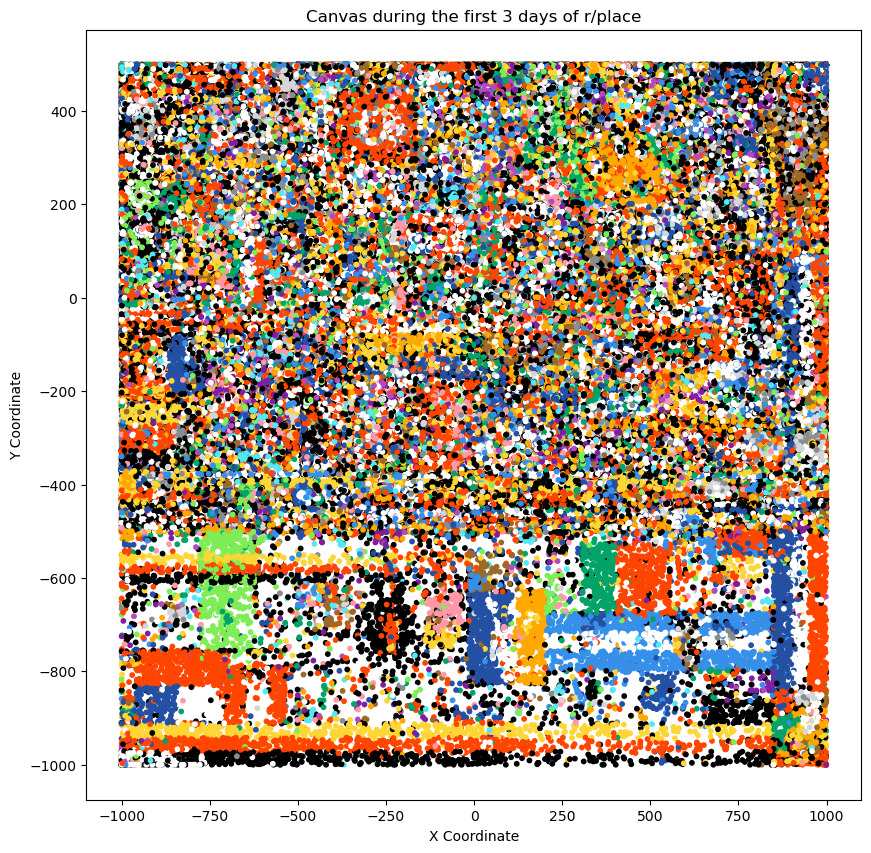

In [9]:
# Plot
plt.figure(figsize=(10, 10))
# for index, row in df_first_3_days.iterrows():
#     plt.scatter(row['x'], row['y'], color=row['pixel_color'], label=row['user'])

plt.scatter(df_first_3_days['x'], df_first_3_days['y'], c=df_first_3_days['pixel_color'], s=10)  # Adjust dot size as needed
plt.title("Canvas during the first 3 days of r/place")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [9]:
top10_3_days = df_first_3_days[["user", "coordinate"]]
top10_group = top10_3_days.groupby("user").count().sort_values(by="coordinate", ascending = False).head(10)

In [11]:
top10_3_df = pd.DataFrame(top10_group).reset_index()
top10_3_df["user"] = top10_3_df["user"].str.extract(r'^(.{8})')
top10_3_df = top10_3_df.rename(columns={"coordinate": "count"})
top10_3_df

,user,count
0,ay5U7RmL,54
1,kN91vAk/,46
2,bRwFe1qJ,37
3,tFRL97+0,34
4,oCgWHk6C,33
5,+4a1m1b3,25
6,/XIhfEKO,22
7,WCnhKn9Z,22
8,UJgZrjNi,21
9,8+D5SY94,20
